In [166]:
# 1. Build data preprocessing pipeline:
#     store
# 1. Explore and select promising models using cross_val_score until "GridSearch":
#     store before fitting as GridSearch to recalculate hyperparameters and parameters
#     store .best_estimator- after fitting as model recalculate parameters

# 2. creating a single pipeline that does the full data preparation plus the final prediction:
#     * preprocessing including feature selection 
#     * predicting
    
    
# Better: store only fitted model (ganzes model, nicht nur .best_estimator):
# ##unterschied:
# #loaded_gridsearch.fit() # fit hyperparameters and parameters
# #loaded_gridsearch.best_estimator_.fit() # fit parameters


# und nutze loaded_gridsearch.best_params_ um gelernte hyperparameter direkt zu sehen

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_pickle("./data.pkl")

# Take a Quick Look ath the Data Structure

In [3]:
df.head()

,price_da_sem,onshore_sem,load_forecast_sem,load_sem,load_gb,wind_gb,solar_gb,temp,rad_direct,rad_diffuse
2015-01-06 00:00:00+00:00,34.340,1573.980,4039.390,3714.860,29776.0,4951.0,0.0,7.082,0.0,0.0
2015-01-06 01:00:00+00:00,35.255,1374.130,3813.930,3454.035,29281.5,5180.5,0.0,6.623,0.0,0.0
2015-01-06 02:00:00+00:00,38.105,1170.995,3609.035,3250.895,28204.5,5566.0,0.0,6.128,0.0,0.0
2015-01-06 03:00:00+00:00,40.555,968.965,3475.500,3133.480,27266.5,5728.5,0.0,5.419,0.0,0.0
2015-01-06 04:00:00+00:00,40.110,871.840,3430.460,3086.280,26489.5,5835.5,0.0,4.506,0.0,0.0


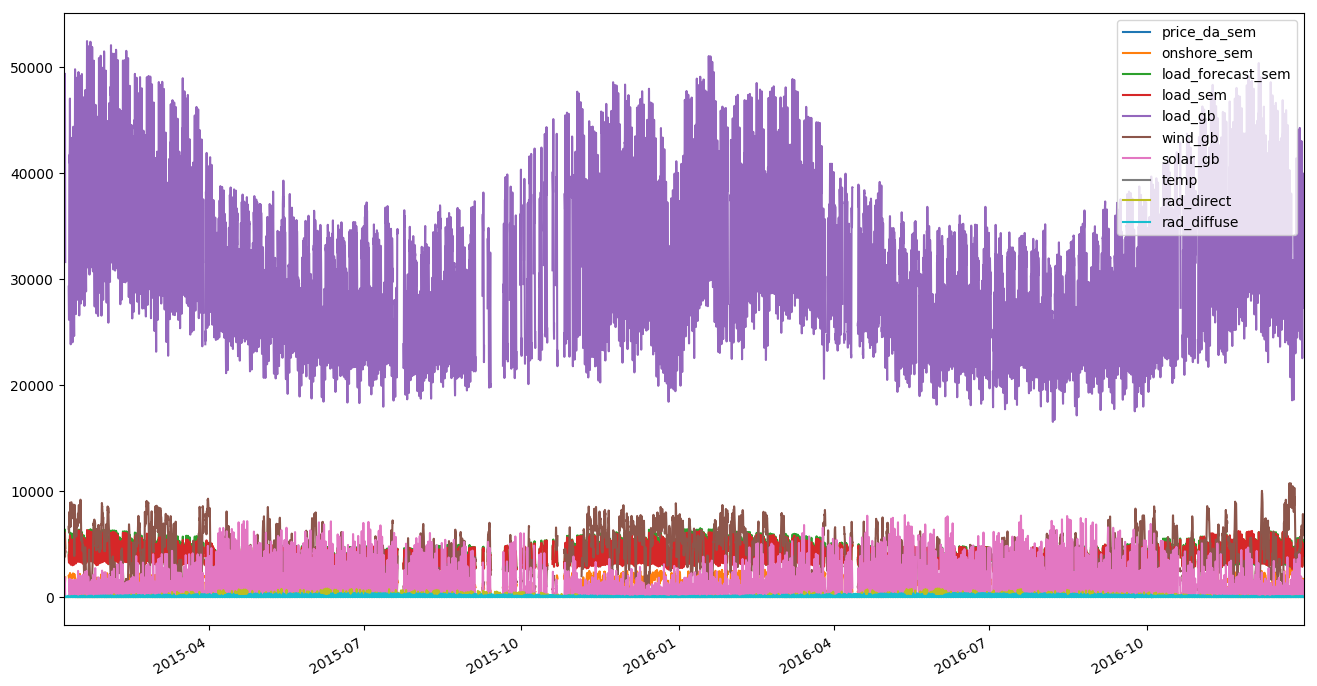

In [170]:
df.plot(figsize=(16,9))

In [171]:
df.shape

(17424, 10)

In [172]:
# search for rows with NaN
df[df.isnull().any(1)].head()

,price_da_sem,onshore_sem,load_forecast_sem,load_sem,load_gb,wind_gb,solar_gb,temp,rad_direct,rad_diffuse
2015-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.810,0.0,0.0
2015-01-07 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.061,0.0,0.0
2015-01-07 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.279,0.0,0.0
2015-01-07 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.437,0.0,0.0
2015-01-07 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.578,0.0,0.0


In [173]:
df.shape

(17424, 10)

In [174]:
df=df.dropna()

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16209 entries, 2015-01-06 00:00:00+00:00 to 2016-12-31 23:00:00+00:00
Data columns (total 10 columns):
price_da_sem         16209 non-null float64
onshore_sem          16209 non-null float64
load_forecast_sem    16209 non-null float64
load_sem             16209 non-null float64
load_gb              16209 non-null float64
wind_gb              16209 non-null float64
solar_gb             16209 non-null float64
temp                 16209 non-null float64
rad_direct           16209 non-null float64
rad_diffuse          16209 non-null float64
dtypes: float64(10)
memory usage: 1.4 MB


In [176]:
df.describe()

,price_da_sem,onshore_sem,load_forecast_sem,load_sem,load_gb,wind_gb,solar_gb,temp,rad_direct,rad_diffuse
count,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,43.822936,893.261171,4131.677385,4037.061394,31802.084089,3621.883707,1351.968814,9.503157,64.444955,67.137796
std,19.848036,667.772944,864.783464,830.297875,7101.111531,2180.175411,1648.826326,4.471552,137.619632,92.020355
min,-38.505000,1.010000,2334.060000,2319.620000,16520.000000,200.500000,0.000000,-0.825000,0.000000,0.000000
25%,32.240000,323.615000,3426.775000,3313.180000,26291.500000,1770.000000,0.000000,5.899000,0.000000,0.000000
50%,39.520000,745.275000,4196.095000,4116.135000,31610.500000,3231.500000,632.000000,9.457000,0.219700,5.466500
75%,49.255000,1388.265000,4743.765000,4630.980000,36564.500000,5249.500000,2125.000000,12.942000,46.064400,117.846200
max,562.655000,2762.915000,6495.630000,6322.210000,52427.000000,10737.000000,7731.000000,23.086000,810.282400,394.658200


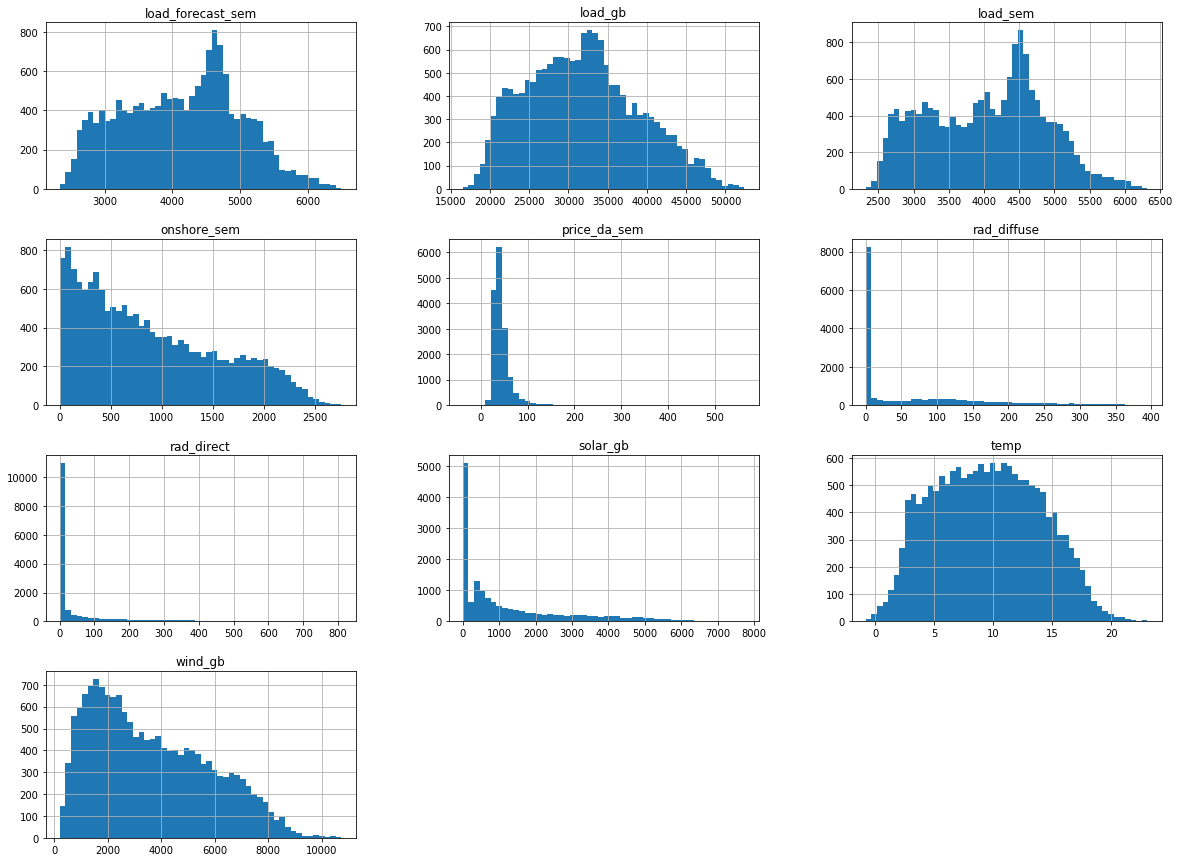

In [177]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
#plt.savefig("./attribute_histogram_plots.png")
plt.show()

# Create a Test Set

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

## stratified sampling: eusure that test set is representative of whole dataset

categorize very important coninuous numerical featuer and apply statified sampling so that this featuere´s proportions in the test set are almost identical to those in the full dataset

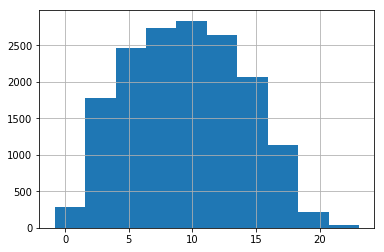

In [180]:
df["temp"].hist()

In [181]:
df["temp_cat"]=pd.cut(df["temp"],
                            bins=[-1, 0, 5, 10, 15, 20, np.inf],
                            labels=[1,2,3,4,5, 6])

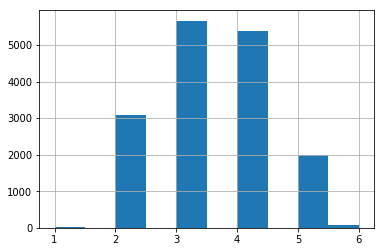

In [182]:
df["temp_cat"].hist()

In [183]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["temp_cat"]):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

In [184]:
strat_test_set["temp_cat"].value_counts() / len(strat_test_set)

3    0.349476
4    0.331585
2    0.189698
5    0.123689
6    0.004010
1    0.001542
Name: temp_cat, dtype: float64

In [185]:
df["temp_cat"].value_counts() / len(df)

3    0.349559
4    0.331544
2    0.189648
5    0.123697
6    0.004010
1    0.001542
Name: temp_cat, dtype: float64

In [186]:
for set_ in (strat_train_set, strat_test_set, df):
    set_.drop("temp_cat", axis=1, inplace=True)

C:\Users\elfru\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Discover and Visualize the Data to Gain Insights

In [187]:
# explore copy of training set!

In [188]:
# possible insights: we need to drop some outliners

In [189]:
ireland = strat_train_set.copy()

In [190]:
ireland.head()

,price_da_sem,onshore_sem,load_forecast_sem,load_sem,load_gb,wind_gb,solar_gb,temp,rad_direct,rad_diffuse
2016-05-17 00:00:00+00:00,27.865,93.200,2938.825,2960.935,23059.0,804.0,0.0,9.176,0.0000,0.0000
2015-06-18 22:00:00+00:00,39.085,575.715,3557.420,3579.535,26558.0,2721.5,0.0,10.443,0.0001,0.0034
2015-02-25 00:00:00+00:00,43.675,1172.280,4071.395,3970.455,31367.5,5180.5,0.0,5.930,0.0000,0.0000
2016-10-09 07:00:00+00:00,35.120,62.070,3143.375,3151.840,26444.5,1563.0,1443.5,9.543,0.0003,0.0059
2016-03-14 00:00:00+00:00,29.115,580.105,3874.030,3476.165,27481.0,1949.5,0.0,6.058,0.0000,0.0000


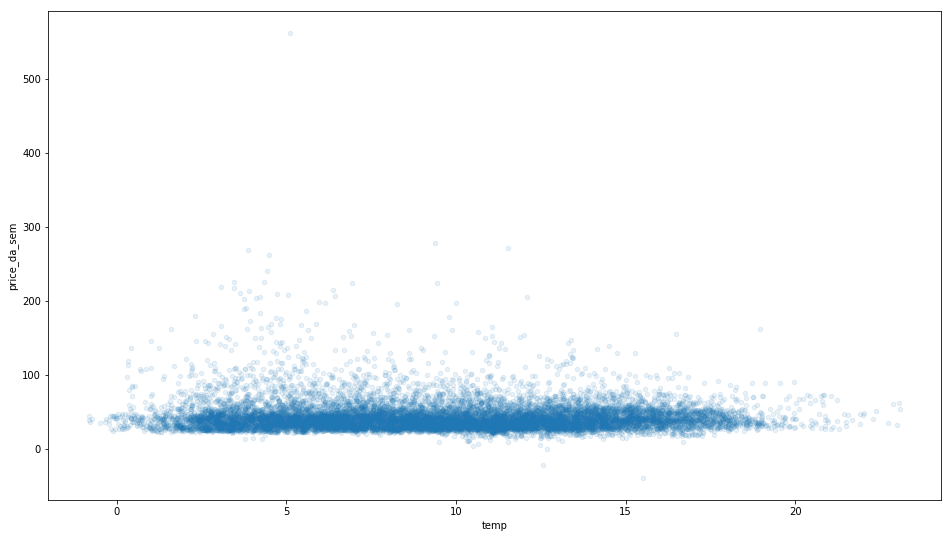

In [191]:
ireland.plot(kind='scatter', x='temp', y='price_da_sem', alpha=0.1, figsize=(16,9)) # set alpha to visualize density of data points
#plt.savefig("./scatter_plot.png")

In [192]:
ireland.loc[ireland['price_da_sem']>300,'price_da_sem']=300

In [193]:
ireland.max()

price_da_sem           300.0000
onshore_sem           2762.9150
load_forecast_sem     6495.6300
load_sem              6322.2100
load_gb              52042.0000
wind_gb              10737.0000
solar_gb              7731.0000
temp                    23.0860
rad_direct             810.2824
rad_diffuse            394.6582
dtype: float64

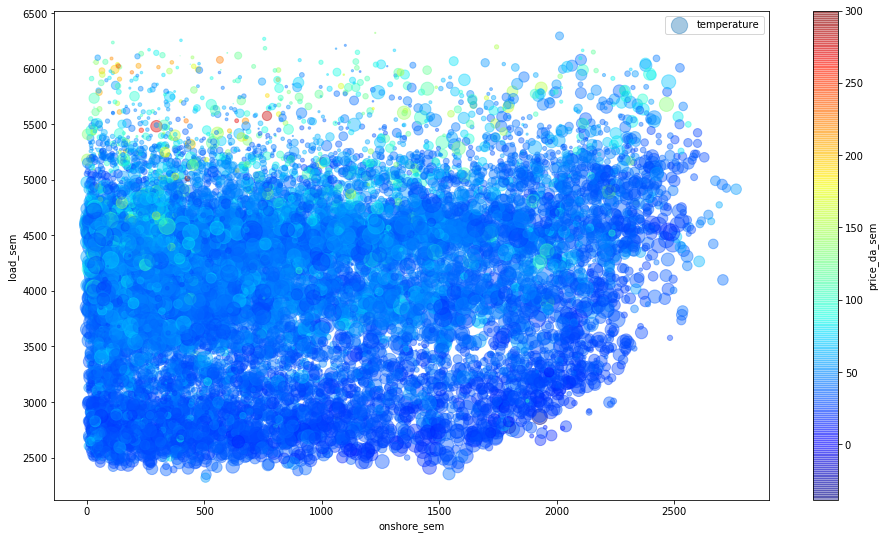

In [194]:
ireland.plot(kind="scatter", x="onshore_sem", y="load_sem", alpha=0.4,
    s=ireland["temp"]**2, label="temperature", figsize=(16,9),
    c="price_da_sem", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()


## Pearson´s r (standard correlation coefficient)

In [195]:
# correlation coefficient only measures linear correlation, it misses out on nonlinear relationships

In [196]:
ireland.corr().round(3)

,price_da_sem,onshore_sem,load_forecast_sem,load_sem,load_gb,wind_gb,solar_gb,temp,rad_direct,rad_diffuse
price_da_sem,1.000,-0.135,0.451,0.448,0.472,-0.028,0.123,-0.055,0.055,0.060
onshore_sem,-0.135,1.000,0.165,0.167,0.100,0.702,-0.061,-0.035,-0.128,-0.034
load_forecast_sem,0.451,0.165,1.000,0.983,0.920,0.198,0.368,-0.095,0.181,0.290
load_sem,0.448,0.167,0.983,1.000,0.912,0.196,0.376,-0.073,0.173,0.308
load_gb,0.472,0.100,0.920,0.912,1.000,0.118,0.189,-0.250,0.030,0.147
wind_gb,-0.028,0.702,0.198,0.196,0.118,1.000,-0.105,-0.177,-0.120,-0.091
solar_gb,0.123,-0.061,0.368,0.376,0.189,-0.105,1.000,0.402,0.702,0.777
temp,-0.055,-0.035,-0.095,-0.073,-0.250,-0.177,0.402,1.000,0.419,0.495
rad_direct,0.055,-0.128,0.181,0.173,0.030,-0.120,0.702,0.419,1.000,0.505
rad_diffuse,0.060,-0.034,0.290,0.308,0.147,-0.091,0.777,0.495,0.505,1.000


In [197]:
ireland.corr()['price_da_sem'].round(3).sort_values(ascending=False)

price_da_sem         1.000
load_gb              0.472
load_forecast_sem    0.451
load_sem             0.448
solar_gb             0.123
rad_diffuse          0.060
rad_direct           0.055
wind_gb             -0.028
temp                -0.055
onshore_sem         -0.135
Name: price_da_sem, dtype: float64

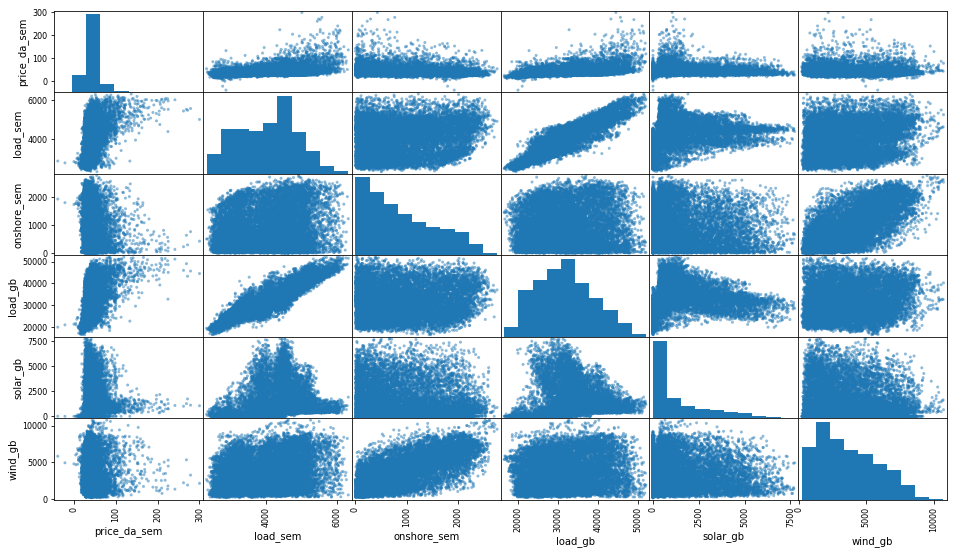

In [198]:
from pandas.plotting import scatter_matrix
attributes=['price_da_sem','load_sem','onshore_sem', 'load_gb', 'solar_gb', 'wind_gb']
scatter_matrix(ireland[attributes], figsize=(16,9))
plt.show()

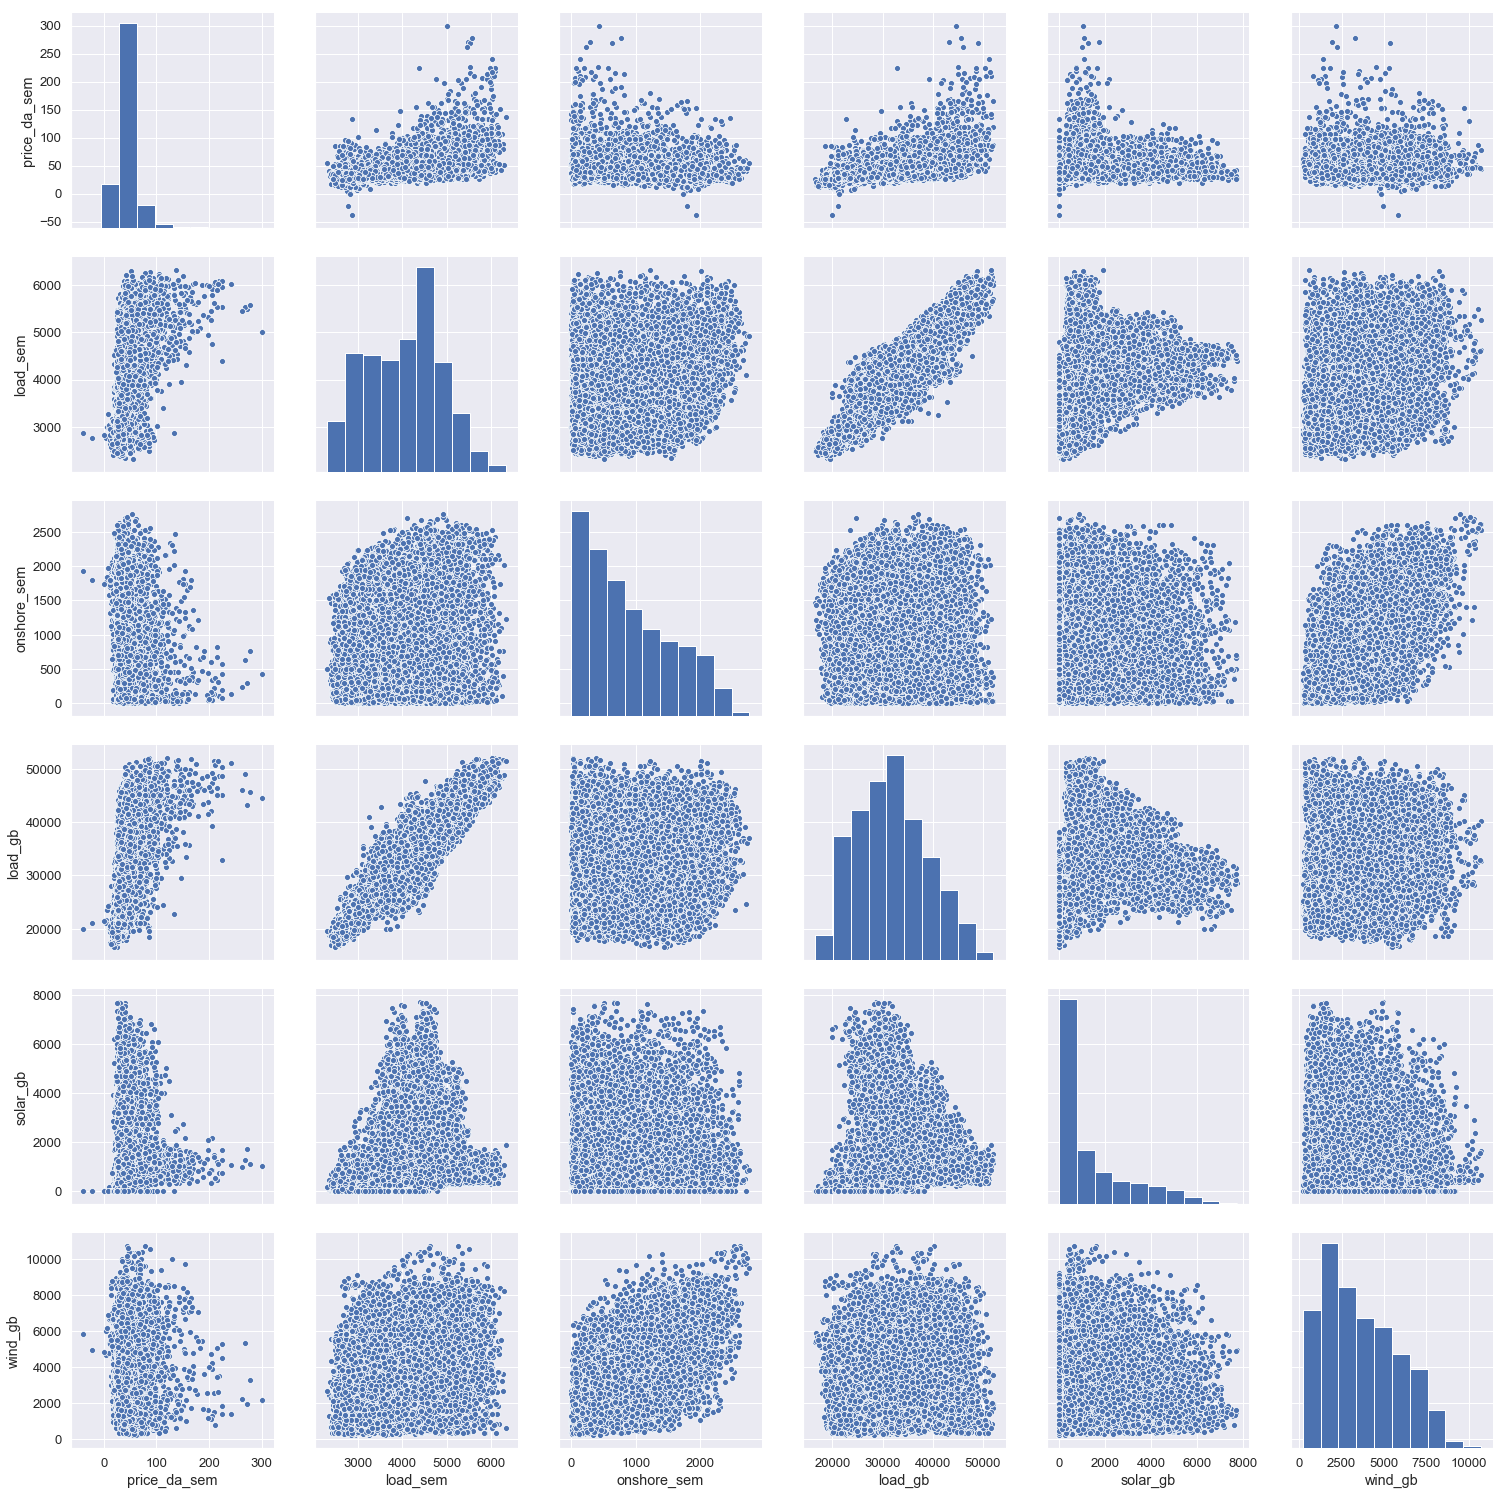

In [199]:
import seaborn as sns
sns.set(font_scale=1.2)
fig=sns.pairplot(data=ireland[attributes], height=3.5)

In [200]:
import matplotlib.style as style
style.use('default')

## Experimenting with Attribute Combinations

In [201]:
ireland.columns

Index(['price_da_sem', 'onshore_sem', 'load_forecast_sem', 'load_sem',
       'load_gb', 'wind_gb', 'solar_gb', 'temp', 'rad_direct', 'rad_diffuse'],
      dtype='object')

In [202]:
ireland['residual_sem']=ireland['load_sem']-ireland['onshore_sem']-ireland['rad_diffuse']-ireland['rad_direct']

In [203]:
ireland['residual_gb']=ireland['load_gb']-ireland['wind_gb']-ireland['solar_gb']

In [204]:
ireland['residual_sem_fc']=ireland['load_forecast_sem']-ireland['onshore_sem']-ireland['rad_diffuse']-ireland['rad_direct']

In [205]:
ireland.corr()['price_da_sem'].round(3).sort_values(ascending=False)

price_da_sem         1.000
residual_sem_fc      0.485
residual_sem         0.480
load_gb              0.472
residual_gb          0.458
load_forecast_sem    0.451
load_sem             0.448
solar_gb             0.123
rad_diffuse          0.060
rad_direct           0.055
wind_gb             -0.028
temp                -0.055
onshore_sem         -0.135
Name: price_da_sem, dtype: float64

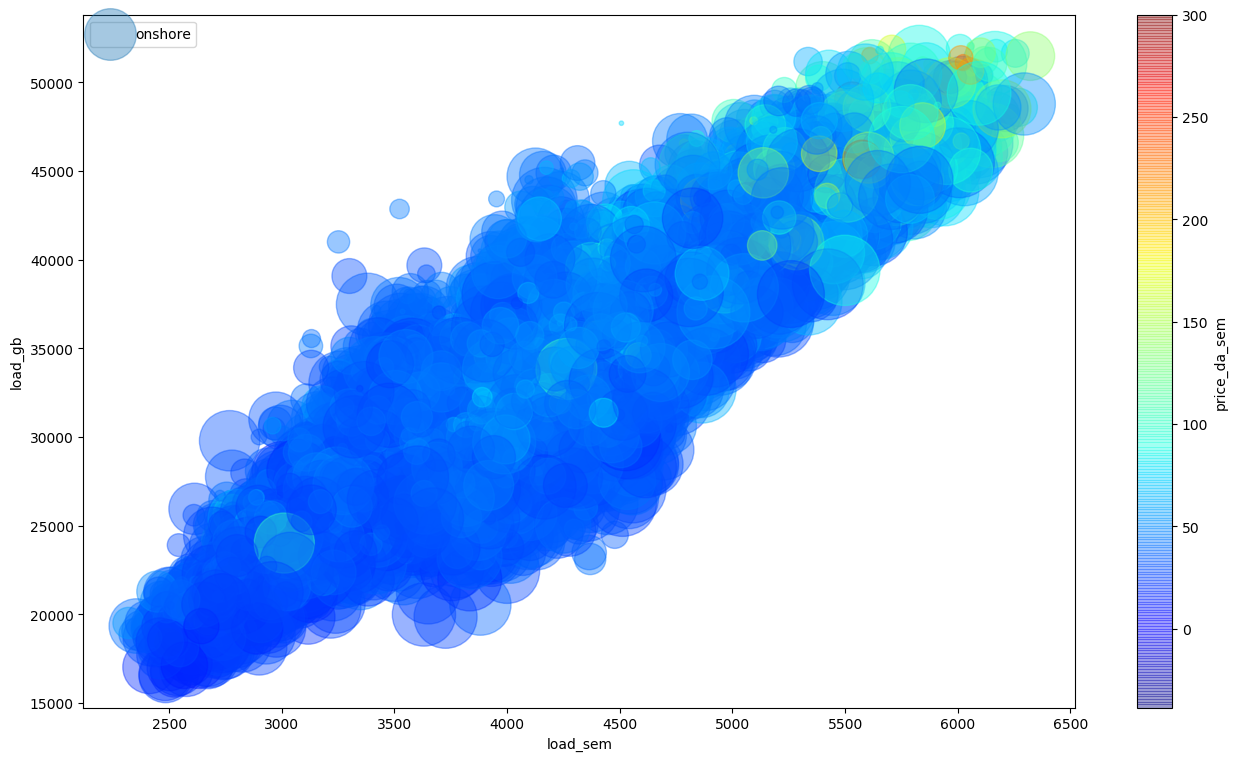

In [206]:
ireland.plot(kind="scatter", x="load_sem", y="load_gb", alpha=0.4,
    s=ireland['onshore_sem'], label="onshore", figsize=(16,9),
    c="price_da_sem", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
#plt.savefig("./scatter_plot.png")

In [207]:
# exploration is an iterative process
# once you get a prototype running you can analyze its output to gain more insights and come back to this exploration step

# Prepare the Data for Machine Learning Algorithms

In [208]:
# revert to clean training set

In [209]:
# separate predictors and labels, since we don´t necessarily want to apply the same transformations to the predictors
# and the target values!!!!!!!!!!!!!!

In [210]:
ireland=strat_train_set.drop("price_da_sem", axis=1)
ireland_labels=strat_train_set["price_da_sem"].copy()

In [211]:
#ireland.to_pickle("./ireland.pkl")
#ireland_labels.to_pickle("./ireland_labels.pkl")

In [212]:
ireland=pd.read_pickle("./ireland.pkl")
ireland_labels=pd.read_pickle("./ireland_labels.pkl")

## Data Cleaning - class SimpleImputer

In [213]:
# SimpleImputer takes care of missing values:
# replaces each attribute´s missing values with the median of that attribute

In [214]:
ireland[ireland.isnull().any(axis=1)]

,onshore_sem,load_forecast_sem,load_sem,load_gb,wind_gb,solar_gb,temp,rad_direct,rad_diffuse


In [215]:
# without SimpleImputer
#median = housing["total_bedrooms"].median()
#sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [216]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
# create copy of data without any text attributes as median only possible for numerical attributes

In [217]:
imputer.fit(ireland)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [218]:
imputer.strategy #estimator´s hyperparameter

'median'

In [219]:
imputer.statistics_ #estimator´s learned parameter

array([7.467450e+02, 4.191005e+03, 4.113250e+03, 3.159800e+04,
       3.240000e+03, 6.360000e+02, 9.443000e+00, 2.191000e-01,
       5.594700e+00])

In [220]:
ireland.median().values

array([7.467450e+02, 4.191005e+03, 4.113250e+03, 3.159800e+04,
       3.240000e+03, 6.360000e+02, 9.443000e+00, 2.191000e-01,
       5.594700e+00])

In [221]:
X = imputer.transform(ireland) #NumPy array

In [222]:
ireland_tr = pd.DataFrame(X, columns=ireland.columns,
                          index=ireland.index)

## Custom Transformers

In [223]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [224]:
ireland.head()

,onshore_sem,load_forecast_sem,load_sem,load_gb,wind_gb,solar_gb,temp,rad_direct,rad_diffuse
2016-05-17 00:00:00+00:00,93.200,2938.825,2960.935,23059.0,804.0,0.0,9.176,0.0000,0.0000
2015-06-18 22:00:00+00:00,575.715,3557.420,3579.535,26558.0,2721.5,0.0,10.443,0.0001,0.0034
2015-02-25 00:00:00+00:00,1172.280,4071.395,3970.455,31367.5,5180.5,0.0,5.930,0.0000,0.0000
2016-10-09 07:00:00+00:00,62.070,3143.375,3151.840,26444.5,1563.0,1443.5,9.543,0.0003,0.0059
2016-03-14 00:00:00+00:00,580.105,3874.030,3476.165,27481.0,1949.5,0.0,6.058,0.0000,0.0000


In [225]:
#ireland['residual_sem']=ireland['load_sem']-ireland['onshore_sem']-ireland['rad_diffuse']-ireland['rad_direct']
#ireland['residual_gb']=ireland['load_gb']-ireland['wind_gb']-ireland['solar_gb']
#ireland['residual_sem_fc']=ireland['load_forecast_sem']-ireland['onshore_sem']-ireland['rad_diffuse']-ireland['rad_direct']

In [226]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index of attributes we need to create new attributes
onshore_sem_ix,load_forecast_sem_ix,load_sem_ix,load_gb_ix,wind_gb_ix,solar_gb_ix,rad_direct_ix,rad_diffuse_ix=0,1,2,3,4,5,7,8

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, residual_sem_fc = True): # no *args or **kargs
        self.residual_sem_fc = residual_sem_fc
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        residual_sem = X[:, load_sem_ix] - X[:, onshore_sem_ix] - X[:, rad_diffuse_ix] - X[:, rad_direct_ix]
        residual_gb = X[:, load_gb_ix] - X[:, wind_gb_ix] - X[:, solar_gb_ix]
        if self.residual_sem_fc:
            residual_sem = X[:, load_forecast_sem_ix] - X[:, onshore_sem_ix] - X[:, rad_diffuse_ix] - X[:, rad_direct_ix]
            return np.c_[X, residual_sem, residual_gb,
                         residual_sem]
        else:
            return np.c_[X, residual_sem, residual_gb]

attr_adder = CombinedAttributesAdder(residual_sem_fc=False)
ireland_extra_attribs = attr_adder.transform(ireland.values)

In [227]:
ireland_extra_attribs

array([[9.3200000e+01, 2.9388250e+03, 2.9609350e+03, ..., 0.0000000e+00,
        2.8677350e+03, 2.2255000e+04],
       [5.7571500e+02, 3.5574200e+03, 3.5795350e+03, ..., 3.4000000e-03,
        3.0038165e+03, 2.3836500e+04],
       [1.1722800e+03, 4.0713950e+03, 3.9704550e+03, ..., 0.0000000e+00,
        2.7981750e+03, 2.6187000e+04],
       ...,
       [2.2080700e+03, 5.7672100e+03, 5.6450900e+03, ..., 0.0000000e+00,
        3.4370200e+03, 3.5941000e+04],
       [4.5594500e+02, 3.9986450e+03, 4.0735700e+03, ..., 2.3350520e+02,
        3.3349717e+03, 3.1086000e+04],
       [7.0761000e+02, 4.7930000e+03, 4.4151600e+03, ..., 1.3871090e+02,
        3.3618243e+03, 3.2501000e+04]])

In [228]:
ireland_extra_attribs = pd.DataFrame(
    ireland_extra_attribs,
    columns=list(ireland.columns)+["residual_sem", "residual_gb"],
    index=ireland.index)
ireland_extra_attribs.head()

,onshore_sem,load_forecast_sem,load_sem,load_gb,wind_gb,solar_gb,temp,rad_direct,rad_diffuse,residual_sem,residual_gb
2016-05-17 00:00:00+00:00,93.200,2938.825,2960.935,23059.0,804.0,0.0,9.176,0.0000,0.0000,2867.7350,22255.0
2015-06-18 22:00:00+00:00,575.715,3557.420,3579.535,26558.0,2721.5,0.0,10.443,0.0001,0.0034,3003.8165,23836.5
2015-02-25 00:00:00+00:00,1172.280,4071.395,3970.455,31367.5,5180.5,0.0,5.930,0.0000,0.0000,2798.1750,26187.0
2016-10-09 07:00:00+00:00,62.070,3143.375,3151.840,26444.5,1563.0,1443.5,9.543,0.0003,0.0059,3089.7638,23438.0
2016-03-14 00:00:00+00:00,580.105,3874.030,3476.165,27481.0,1949.5,0.0,6.058,0.0000,0.0000,2896.0600,25531.5


## Pipeline for preprocessing the numerical attributes

In [229]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder(residual_sem_fc=False)),
        ('std_scaler', StandardScaler()),
    ])

ireland_num_tr = num_pipeline.fit_transform(ireland)

In [230]:
ireland_num_tr

array([[-1.1978106 , -1.37685243, -1.29369297, ..., -0.72857936,
        -0.15292971, -0.65191667],
       [-0.4767426 , -0.66323331, -0.55042794, ..., -0.7285426 ,
        -0.00790436, -0.42660755],
       [ 0.41476115, -0.07030517, -0.08072674, ..., -0.72857936,
        -0.22706149, -0.0917425 ],
       ...,
       [ 1.96264054,  1.88600874,  1.93139357, ..., -0.72857936,
         0.4537711 ,  1.29786555],
       [-0.65572629, -0.1542305 ,  0.04316879, ...,  1.79568976,
         0.34501575,  0.60619576],
       [-0.27963937,  0.76214761,  0.45359863, ...,  0.77093175,
         0.37363322,  0.80778438]])

In [231]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(ireland)
cat_attribs = []

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

ireland_prepared = full_pipeline.fit_transform(ireland)

In [232]:
ireland_prepared

array([[-1.1978106 , -1.37685243, -1.29369297, ..., -0.72857936,
        -0.15292971, -0.65191667],
       [-0.4767426 , -0.66323331, -0.55042794, ..., -0.7285426 ,
        -0.00790436, -0.42660755],
       [ 0.41476115, -0.07030517, -0.08072674, ..., -0.72857936,
        -0.22706149, -0.0917425 ],
       ...,
       [ 1.96264054,  1.88600874,  1.93139357, ..., -0.72857936,
         0.4537711 ,  1.29786555],
       [-0.65572629, -0.1542305 ,  0.04316879, ...,  1.79568976,
         0.34501575,  0.60619576],
       [-0.27963937,  0.76214761,  0.45359863, ...,  0.77093175,
         0.37363322,  0.80778438]])

In [233]:
# -> only fit_transform attributes, not labels
# -> fit_transform training data as well as test data

# Select and train a model

In [234]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(ireland_prepared, ireland_labels)
ireland_predictions = lin_reg.predict(ireland_prepared)

In [235]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

lin_mse = mean_squared_error(ireland_labels, ireland_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(ireland_labels, ireland_predictions)
lin_rmse, lin_mae

(17.33588513411442, 10.871356786620938)

In [236]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, ireland_prepared, ireland_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [237]:
pd.Series(lin_rmse_scores).describe()

count    10.000000
mean     17.276808
std       1.690314
min      15.327467
25%      16.515793
50%      16.889214
75%      18.012155
max      21.099060
dtype: float64

17.33 > 17.27


-> slightly underfitting

In [238]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(ireland_prepared, ireland_labels)
ireland_predictions = forest_reg.predict(ireland_prepared)

In [239]:
forest_mse = mean_squared_error(ireland_labels, ireland_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse, forest_mse

(5.541702293954791, 30.710464314823795)

In [240]:
forest_scores = cross_val_score(forest_reg, ireland_prepared, ireland_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [241]:
pd.Series(forest_rmse_scores).describe()

count    10.000000
mean     14.916461
std       1.575249
min      13.274385
25%      13.963087
50%      14.432974
75%      15.420742
max      18.821619
dtype: float64

5.54 > 14.9


-> overfitting!!

# GridSearch

### random forest model

In [242]:
# To check which parameters are needed in the pipeline:
forest_reg.get_params().keys()

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [243]:
from sklearn.model_selection import GridSearchCV

param_grid_forest = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}
    # then try 6 (2×3) combinations with bootstrap set as False
  ]

#forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_forest = GridSearchCV(forest_reg, param_grid_forest, cv=5,
                           scoring='neg_mean_squared_error', #what is default for scoring?
                           return_train_score=True)
grid_search_forest.fit(ireland_prepared, ireland_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [244]:
grid_search_forest.best_params_

{'max_features': 6, 'n_estimators': 30}

In [245]:
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [246]:
grid_search_forest.best_estimator_.feature_importances_ #attribute bei forest_reg

array([0.06882571, 0.12166401, 0.1036365 , 0.177286  , 0.08032811,
       0.07269918, 0.07830461, 0.04242511, 0.05169171, 0.14467301,
       0.05846606])

In [247]:
feature_importances=grid_search_forest.best_estimator_.feature_importances_ #attribute bei forest_reg

In [248]:
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

17.957467777152335 {'max_features': 2, 'n_estimators': 3}
15.760598583044445 {'max_features': 2, 'n_estimators': 10}
15.250763697338932 {'max_features': 2, 'n_estimators': 30}
17.807526051725592 {'max_features': 4, 'n_estimators': 3}
15.981099626323116 {'max_features': 4, 'n_estimators': 10}
15.327426478192875 {'max_features': 4, 'n_estimators': 30}
17.736105437385273 {'max_features': 6, 'n_estimators': 3}
15.701376107943513 {'max_features': 6, 'n_estimators': 10}
15.23078926047902 {'max_features': 6, 'n_estimators': 30}
17.829610808643736 {'max_features': 8, 'n_estimators': 3}
15.917646477330289 {'max_features': 8, 'n_estimators': 10}
15.369011993684223 {'max_features': 8, 'n_estimators': 30}


In [249]:
extra_attribs = ["residual_sem", "residual_gb"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
#cat_encoder = full_pipeline.named_transformers_["cat"]
#cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs #+ cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.1772859980934261, 'load_gb'),
 (0.14467301294260385, 'residual_sem'),
 (0.12166401267620222, 'load_forecast_sem'),
 (0.1036364999387632, 'load_sem'),
 (0.08032810560338173, 'wind_gb'),
 (0.07830460855886233, 'temp'),
 (0.07269918402466828, 'solar_gb'),
 (0.06882570583209938, 'onshore_sem'),
 (0.05846605590672259, 'residual_gb'),
 (0.05169170600046091, 'rad_diffuse'),
 (0.04242511042280941, 'rad_direct')]

### Linear regression model

In [250]:
from sklearn.pipeline import make_pipeline

In [251]:
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(PolynomialFeatures(2), lin_reg)

In [252]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'polynomialfeatures', 'linearregression', 'polynomialfeatures__degree', 'polynomialfeatures__include_bias', 'polynomialfeatures__interaction_only', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

In [253]:
param_grid = [
    # try 2 combinations of hyperparameters
    {'linearregression__fit_intercept': [True,False]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'linearregression__fit_intercept': [True,False], 'polynomialfeatures__degree':[1,2,3]},
  ]

In [254]:
# train across 5 folds, that's a total of (2+6)*5=40 rounds of training 
grid_search = GridSearchCV(pipe, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(ireland_prepared, ireland_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'linearregression__fit_intercept': [True, False]}, {'linearregression__fit_intercept': [True, False], 'polynomialfeatures__degree': [1, 2, 3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [255]:
grid_search.best_params_

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 3}

In [256]:
final_model = grid_search.best_estimator_

In [257]:
final_model

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False))])

In [258]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

16.513176125690375 {'linearregression__fit_intercept': True}
16.379325752986986 {'linearregression__fit_intercept': False}
17.34866785750069 {'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 1}
16.513176125690375 {'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 2}
15.78046352158634 {'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 3}
17.348316756629707 {'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 1}
16.379325752986986 {'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 2}
15.780378654249294 {'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 3}


In [259]:
grid_search.best_estimator_.named_steps['linearregression']

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [260]:
grid_search.best_estimator_.named_steps['linearregression'].coef_

array([ 4.36861516e+01, -1.19901143e+00, -5.20211435e+00,  1.38548355e+00,
        2.99078749e+00,  1.60688094e+00,  2.25894427e+00,  2.07172841e+00,
       -5.90980542e-02,  3.23463304e+00,  1.77372059e+00,  2.00187428e+00,
       -3.42197200e-01, -1.02030024e+00, -1.41217259e+00,  8.58064527e-01,
        1.01830278e+00, -1.51683909e+00,  5.83854085e-01,  8.90828177e-01,
        9.85568280e-02, -1.14851690e+00,  9.09083392e-01, -4.48411266e+00,
        2.22718067e+00,  1.52661537e+00, -1.62866614e+00,  3.71988426e+00,
       -2.27656842e-01, -1.67674422e+00,  2.17345458e-01,  2.92686150e+00,
        1.18124352e+00, -4.15662047e+00,  2.00548155e+00,  2.12789991e+00,
       -1.40374858e+00,  2.49136928e+00,  3.17416095e+00, -5.94954882e+00,
       -2.55739644e+00,  1.70055490e+00, -1.75636323e-01,  2.73824670e-01,
        3.28694322e+00, -4.71144658e-01, -2.15074915e+00, -5.84281188e-01,
        1.53901590e+00, -1.03468672e+00,  3.88728606e-01,  2.54914311e+00,
       -2.06932561e-01, -

In [261]:
grid_search.best_estimator_.named_steps['polynomialfeatures'].get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x8^2',
 'x8 x9',
 'x8 x10',
 'x9^2',
 'x9 x10',
 'x10^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0^2 x3',
 'x0^2 x4',
 'x0^2 x5',
 'x0^2 x6',
 'x0^2 x7',
 'x0^2 x8',
 'x0^2 x9',
 'x0^2 x10',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x1 x3',
 'x0 x1 x4',
 'x0 x1 x5',
 'x0 x1 x6',
 'x0 x1 x7',
 'x0 x1 x8',
 'x0 x1 x9',
 'x0 x1 x1

In [262]:
grid_search.predict(ireland_prepared)

array([38.58998841, 40.14595727, 40.8592788 , ..., 53.84853928,
       58.10499415, 47.98983205])

# Evaulation on test set

In [263]:
strat_test_set.head()

,price_da_sem,onshore_sem,load_forecast_sem,load_sem,load_gb,wind_gb,solar_gb,temp,rad_direct,rad_diffuse
2015-11-07 04:00:00+00:00,34.230,306.200,2993.140,2819.130,21937.5,3362.0,0.0,10.212,0.0000,0.0000
2015-02-06 12:00:00+00:00,43.005,94.075,5517.185,5225.570,44611.0,2466.0,3108.0,5.630,80.3156,161.8461
2016-05-19 00:00:00+00:00,29.240,170.960,2984.150,3002.990,23062.0,1135.5,0.0,8.432,0.0000,0.0000
2015-03-27 18:00:00+00:00,65.465,310.850,5152.550,4907.485,42135.5,1246.5,422.5,7.686,0.4940,10.5556
2016-07-22 00:00:00+00:00,28.730,394.670,2871.615,2996.480,22914.0,1678.5,0.0,15.072,0.0000,0.0000


In [264]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("price_da_sem", axis=1)
y_test = strat_test_set["price_da_sem"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [265]:
final_rmse

14.265703327009453

We can compute a 95% confidence interval for the test RMSE:

In [266]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([13.17494643, 15.27878822])

We could compute the interval manually like this: (as learned in edx course)

In [267]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(13.174946431658517, 15.2787882160669)

Alternatively, we could use a z-scores rather than t-scores: (as learned in edx course)

In [268]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(13.175370631948544, 15.278422416574431)

In [269]:
## instead of GridSearchCV also RandomizedSearchCV possible:

In [270]:
#from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import randint

#param_distribs = {
#        'n_estimators': randint(low=1, high=200),
#        'max_features': randint(low=1, high=8),
#    }

#forest_reg = RandomForestRegressor(random_state=42)
#rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
#                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
#rnd_search.fit(housing_prepared, housing_labels)

In [271]:
#cvres = rnd_search.cv_results_
#for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#    print(np.sqrt(-mean_score), params)

# Complete Pipeline

In [1]:
# - when final model found, build complete pipeline for future usage

In [272]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("forest_reg", RandomForestRegressor(random_state=42))
    ])

#full_pipeline_with_predictor.fit(ireland, ireland_labels)
#full_pipeline_with_predictor.predict(some_data)

In [273]:
full_pipeline_with_predictor.named_steps.preparation

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('attribs_adder', CombinedAttributesAdder(residual_sem_fc=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_st...     dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True), [])])

In [274]:
# To check which parameters are needed in the pipeline:
full_pipeline_with_predictor.get_params().keys()

dict_keys(['memory', 'steps', 'preparation', 'forest_reg', 'preparation__n_jobs', 'preparation__remainder', 'preparation__sparse_threshold', 'preparation__transformer_weights', 'preparation__transformers', 'preparation__num', 'preparation__cat', 'preparation__num__memory', 'preparation__num__steps', 'preparation__num__imputer', 'preparation__num__attribs_adder', 'preparation__num__std_scaler', 'preparation__num__imputer__copy', 'preparation__num__imputer__fill_value', 'preparation__num__imputer__missing_values', 'preparation__num__imputer__strategy', 'preparation__num__imputer__verbose', 'preparation__num__attribs_adder__residual_sem_fc', 'preparation__num__std_scaler__copy', 'preparation__num__std_scaler__with_mean', 'preparation__num__std_scaler__with_std', 'preparation__cat__categorical_features', 'preparation__cat__categories', 'preparation__cat__dtype', 'preparation__cat__handle_unknown', 'preparation__cat__n_values', 'preparation__cat__sparse', 'forest_reg__bootstrap', 'forest_re

In [275]:
from sklearn.model_selection import GridSearchCV

param_grid_forest_complete = [
    {'preparation__num__attribs_adder__residual_sem_fc' : [True,False], \
     'forest_reg__n_estimators': [3, 10, 30], 'forest_reg__max_features': [2, 4, 6, 8]}
  ]

#forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_forest_complete = GridSearchCV(full_pipeline_with_predictor, param_grid_forest_complete, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_forest_complete.fit(ireland, ireland_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preparation', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbos...ors='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'preparation__num__attribs_adder__residual_sem_fc': [True, False], 'forest_reg__n_estimators': [3, 10, 30], 'forest_reg__max_features': [2, 4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [276]:
grid_search_forest_complete.best_estimator_.named_steps

{'preparation': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
          transformer_weights=None,
          transformers=[('num', Pipeline(memory=None,
      steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
        strategy='median', verbose=0)), ('attribs_adder', CombinedAttributesAdder(residual_sem_fc=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_st...     dtype=<class 'numpy.float64'>, handle_unknown='error',
        n_values=None, sparse=True), [])]),
 'forest_reg': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
            verbose=0, warm_start=False)}

In [277]:
grid_search_forest_complete.best_estimator_.named_steps['preparation']

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('attribs_adder', CombinedAttributesAdder(residual_sem_fc=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_st...     dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True), [])])

In [278]:
grid_search_forest_complete.best_estimator_.named_steps['forest_reg']

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [279]:
feature_importances=grid_search_forest_complete.best_estimator_.named_steps['forest_reg'].feature_importances_ #attribute bei forest_reg

In [280]:
feature_importances

array([0.06882571, 0.12166401, 0.1036365 , 0.177286  , 0.08032811,
       0.07269918, 0.07830461, 0.04242511, 0.05169171, 0.14467301,
       0.05846606])

In [281]:
cvres = grid_search_forest_complete.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

18.14299382001823 {'forest_reg__max_features': 2, 'forest_reg__n_estimators': 3, 'preparation__num__attribs_adder__residual_sem_fc': True}
17.959574211251894 {'forest_reg__max_features': 2, 'forest_reg__n_estimators': 3, 'preparation__num__attribs_adder__residual_sem_fc': False}
15.781874807853459 {'forest_reg__max_features': 2, 'forest_reg__n_estimators': 10, 'preparation__num__attribs_adder__residual_sem_fc': True}
15.760440109078981 {'forest_reg__max_features': 2, 'forest_reg__n_estimators': 10, 'preparation__num__attribs_adder__residual_sem_fc': False}
15.301371651461107 {'forest_reg__max_features': 2, 'forest_reg__n_estimators': 30, 'preparation__num__attribs_adder__residual_sem_fc': True}
15.252990984558895 {'forest_reg__max_features': 2, 'forest_reg__n_estimators': 30, 'preparation__num__attribs_adder__residual_sem_fc': False}
18.47025825759416 {'forest_reg__max_features': 4, 'forest_reg__n_estimators': 3, 'preparation__num__attribs_adder__residual_sem_fc': True}
17.805172487918

In [282]:
extra_attribs = ["residual_sem", "residual_gb"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
#cat_encoder = full_pipeline.named_transformers_["cat"]
#cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs #+ cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.1772859980934261, 'load_gb'),
 (0.14467301294260385, 'residual_sem'),
 (0.12166401267620222, 'load_forecast_sem'),
 (0.1036364999387632, 'load_sem'),
 (0.08032810560338173, 'wind_gb'),
 (0.07830460855886233, 'temp'),
 (0.07269918402466828, 'solar_gb'),
 (0.06882570583209938, 'onshore_sem'),
 (0.05846605590672259, 'residual_gb'),
 (0.05169170600046091, 'rad_diffuse'),
 (0.04242511042280941, 'rad_direct')]

In [283]:
attributes

['onshore_sem',
 'load_forecast_sem',
 'load_sem',
 'load_gb',
 'wind_gb',
 'solar_gb',
 'temp',
 'rad_direct',
 'rad_diffuse',
 'residual_sem',
 'residual_gb']

In [284]:
feature_importances

array([0.06882571, 0.12166401, 0.1036365 , 0.177286  , 0.08032811,
       0.07269918, 0.07830461, 0.04242511, 0.05169171, 0.14467301,
       0.05846606])

In [285]:
final_model_complete = grid_search_forest_complete.best_estimator_ # model including trained hyperparameter

X_test = strat_test_set.drop("price_da_sem", axis=1)
y_test = strat_test_set["price_da_sem"].copy()

#X_test_prepared = full_pipeline_with_predictor.transform(X_test) #not needed as transformation part of pipeline
final_predictions = final_model_complete.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [286]:
# if data preparation part of pipeline:
# -> fit and predict pure data, not prepared data 
# see Exercise solution 4. in 02_end_to_end_machine_learning

In [287]:
final_rmse

13.85082843346389

# Store everything

In [288]:
# data
# pipeline with default values: only useful for preprocessing
# best models to fit parameters (and hyperparameters if needed)
# complete preprocessing and prediction model to fit parameters (and hyperparameters if needed)
# rmse of complete model

In [289]:
df.to_pickle("./ml_df.pkl")

In [290]:
from sklearn.externals import joblib

In [291]:
# preprocessing pipeline
joblib.dump(full_pipeline, 'ml_preprocessing_pipeline.pkl')

['ml_preprocessing_pipeline.pkl']

In [292]:
# prediction model
joblib.dump(grid_search, 'ml_model_.pkl') #eigentlich: grid_search_forest

['ml_model_.pkl']

In [293]:
# complete preprocessing and prediction model
joblib.dump(grid_search_forest_complete, 'ml_complete_model.pkl')

['ml_complete_model.pkl']

In [294]:
joblib.dump(final_rmse, 'ml_rmse.pkl')

['ml_rmse.pkl']

# How to use saved model

In [295]:
loaded_gridsearch = joblib.load('ml_complete_model.pkl')

In [296]:
loaded_gridsearch.best_params_

{'forest_reg__max_features': 6,
 'forest_reg__n_estimators': 30,
 'preparation__num__attribs_adder__residual_sem_fc': False}

In [297]:
loaded_gridsearch.best_estimator_.named_steps['forest_reg']

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [298]:
loaded_gridsearch.best_estimator_.named_steps['forest_reg'].feature_importances_ 

array([0.06882571, 0.12166401, 0.1036365 , 0.177286  , 0.08032811,
       0.07269918, 0.07830461, 0.04242511, 0.05169171, 0.14467301,
       0.05846606])

## fit only new parameter: .best_estimator_.fit

In [299]:
loaded_gridsearch.best_estimator_.fit(ireland[:10], ireland_labels[:10]) #fit parameter

Pipeline(memory=None,
     steps=[('preparation', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbos...imators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False))])

In [300]:
loaded_gridsearch.best_params_ #hyperparameters stayed the same

{'forest_reg__max_features': 6,
 'forest_reg__n_estimators': 30,
 'preparation__num__attribs_adder__residual_sem_fc': False}

In [301]:
loaded_gridsearch.best_estimator_.named_steps['forest_reg']

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [302]:
loaded_gridsearch.best_estimator_.named_steps['forest_reg'].feature_importances_ #new parameters

array([0.08426489, 0.04289618, 0.07395272, 0.09816507, 0.23244871,
       0.03801818, 0.22690115, 0.02469696, 0.04445694, 0.08637751,
       0.0478217 ])

## fit new hyperparamter and parameter: .fit

In [303]:
loaded_gridsearch.fit(ireland[:10], ireland_labels[:10]) #fit new hyperparameter and parameter

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preparation', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbos...ors='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'preparation__num__attribs_adder__residual_sem_fc': [True, False], 'forest_reg__n_estimators': [3, 10, 30], 'forest_reg__max_features': [2, 4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [304]:
loaded_gridsearch.best_params_ #new hyperparameters

{'forest_reg__max_features': 4,
 'forest_reg__n_estimators': 10,
 'preparation__num__attribs_adder__residual_sem_fc': True}

In [305]:
loaded_gridsearch.best_estimator_.named_steps['forest_reg']

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [306]:
loaded_gridsearch.best_estimator_.named_steps['forest_reg'].feature_importances_ #new parameters

array([9.89820191e-02, 1.54479705e-01, 1.77640593e-01, 3.90096609e-03,
       1.61064329e-01, 1.13927938e-01, 1.04030924e-01, 1.25158227e-04,
       1.13856756e-02, 7.84904155e-03, 1.12646108e-01, 5.39675413e-02])

In [1]:
# You can use both .predict() or .best_estimator_.predict() - result is the same

In [308]:
loaded_gridsearch.predict(X_test[:10])

array([36.187 , 36.498 , 35.5085, 40.4125, 36.3005, 37.386 , 39.4835,
       38.7775, 42.2395, 36.5405])

In [309]:
loaded_gridsearch.best_estimator_.predict(X_test[:10])

array([36.187 , 36.498 , 35.5085, 40.4125, 36.3005, 37.386 , 39.4835,
       38.7775, 42.2395, 36.5405])

In [310]:
X_test = strat_test_set.drop("price_da_sem", axis=1)
y_test = strat_test_set["price_da_sem"].copy()

#X_test_prepared = full_pipeline_with_predictor.transform(X_test) #not needed as transformation part of pipeline
final_predictions = loaded_gridsearch.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [311]:
final_rmse

18.236147026411803